# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [422]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [423]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [424]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [425]:
penguins = penguins.dropna()

In [426]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [427]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

In [428]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.init_center=None
        
    def initialize_centers(self, X):
        np.random.shuffle(X)
        return X[:self.k]
    
    def get_closest_center(self, X, centers):
        distances = np.sqrt(((X - centers[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def update_centers(self, X, labels):
        centers = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centers[i] = np.mean(X[labels==i], axis=0)
        return centers
    
    def fit(self, X,c=None,d=None):
        if d==1:
            centers = c
            self.init_center=centers 
        else:
            centers = self.initialize_centers(X)
            self.init_center=centers
        for i in range(self.max_iters):
            labels = self.get_closest_center(X, centers)
            new_centers = self.update_centers(X, labels)
            if np.allclose(centers, new_centers):
                break
            centers = new_centers
        self.labels_ = labels
        self.cluster_centers_ = centers
    
    def predict(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def get_wss(self, X):
        distances = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
        labels = self.labels_
        wss = 0
        for i in range(self.k):
            cluster_points = X[labels==i]
            cluster_distance = distances[i][labels==i]
            wss += np.sum(cluster_distance**2)
        return wss


In [429]:
kmeans = KMeans(k=5)
kmeans.fit(X)

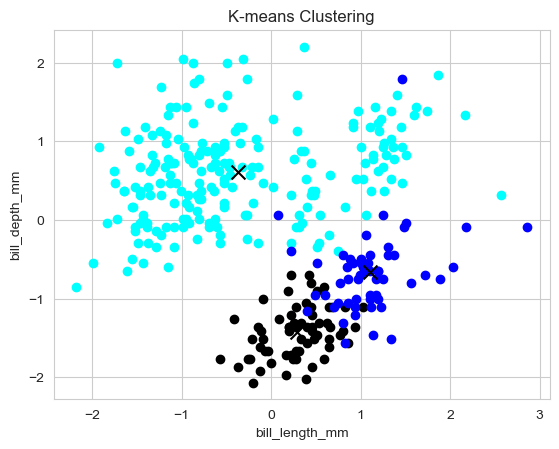

In [430]:
#Make a plot where the color is the label assigned by the clustering
import matplotlib.pyplot as plt

# Fit the K-means model with k=2
kmeans = KMeans(k=3)
kmeans.fit(X)

# Plot the cluster assignments
colors = ['Aqua', 'Black', 'Blue', 'Fuchsia', 'Gray', 'Green', 'Lime', 'Maroon', 'Navy', 'Olive', 'Purple', 'Red', 'Silver', 'Teal', 'White', 'Yellow']
for i in range(kmeans.k):
    plt.scatter(X[kmeans.labels_ == i, 0], X[kmeans.labels_ == i, 1], color=colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='k', marker='x', s=100)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('K-means Clustering')
plt.show()


[0 1 2 0 0 1 0 0 1 0 0 1 2 1 0 0 1 1 2 1 0 0 0 1 0 0 1 0 1 2 0 0 0 0 0 0 0
 0 2 2 0 0 2 1 1 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 0 2 0 0 1 0 0 0 0 0 0 0 0 2
 0 0 0 0 1 1 0 1 0 0 0 1 0 2 2 2 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 2 2 0 0 2 1
 0 0 0 1 1 0 0 0 0 0 1 2 0 0 0 0 0 1 2 0 0 0 0 2 0 0 0 0 1 2 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 2 1 0 0 0 2 0 2 2 0 1 0 1 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 2 1 0 0 2 0 0 1 2 0 2 1 0 0 1 0 0 2 0 0 0 0 0 0 2 0
 0 1 0 0 0 1 2 0 0 0 1 0 0 1 0 0 0 2 0 2 0 0 1 0 2 2 1 0 1 0 2 1 2 0 0 0 2
 0 0 0 0 1 1 0 0 0 2 0 1 0 0 0 1 0 0 2 2 1 2 0 0 2 1 2 1 0 0 0 2 0 0 0 0 0
 0 0 2 0 0 0 1 2 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 2 1 0 0 0 1 1 2 0 0 0 2 0]


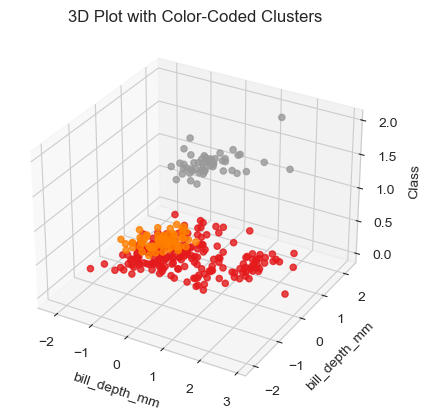

In [431]:

#Make a 3D plot where the color is the label assigned by the clustering

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(kmeans.predict(X))
# Plot data points with color-coded labels
ax.scatter(X[:, 0], X[:, 1], kmeans.predict(X), c=kmeans.predict(X), cmap='Set1', alpha=0.8)

# Add labels and title
ax.set_xlabel('bill_depth_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('Class')
ax.set_title('3D Plot with Color-Coded Clusters')

# Show plot
plt.show()

In [432]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table

##In the context of scipy's linear_sum_assignment function, the classes correspond 
##to rows and the labels correspond to columns in a cost matrix. The goal is to assign
##each row to a column such that the total cost is minimized.

import scipy.optimize as opt

print("Data: ")
print(X)

row_ind, col_ind = opt.linear_sum_assignment(X)

print("corresponding ")
print(row_ind) # [ 72 274 293 319]
print(col_ind) # [0 2 1 3]

Data: 
[[-0.58471229  0.62815946 -0.42637319 -0.38190898]
 [ 0.45915754 -1.86386045  0.64546078  0.42654284]
 [ 1.3015788  -0.43984907  1.36001676  2.23001228]
 ...
 [-0.82278787  0.11958397 -1.06947358 -0.50628618]
 [ 1.17338426 -0.74499437  1.50292796  1.91906927]
 [-0.71290683  0.8824472  -0.92656238  0.11559983]]
corresponding 
[192 222 297 318]
[1 3 0 2]


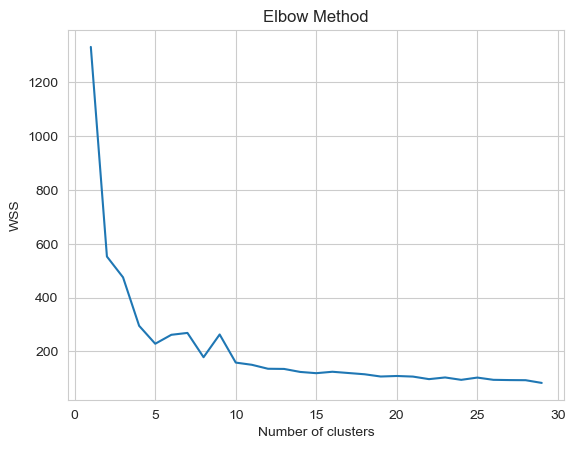

In [433]:
#TODO Do the elbow method for different k's
wss = []
for i in range(1, 30):
    kmeans = KMeans(k=i)
    kmeans.fit(X)
    a=kmeans.get_wss(X)
    wss.append(a)

# Plot the WSS values against the number of clusters
x=np.arange(1,30)
plt.plot(x, wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

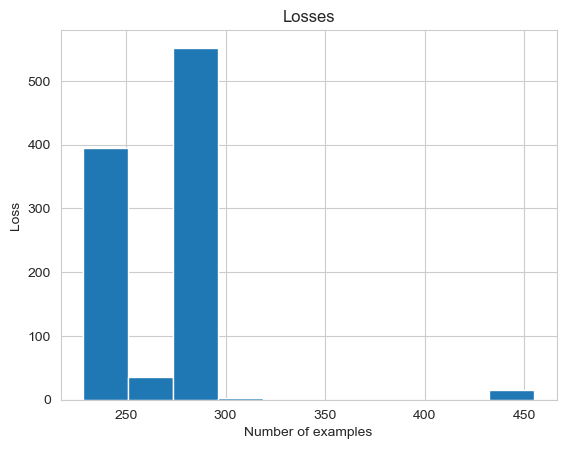

In [434]:
#TODO train 1000 models, with random initialization. Plot the results of the losses
#TODO Do the elbow method for different k's
looses = []
initial_values=[]
kmeans = KMeans(k=5)
for i in range(1000):
    kmeans.fit(X)
    a=kmeans.get_wss(X)
    looses.append(a)
    initial_values.append(kmeans.init_center)

# Plot the WSS values against the number of clusters
x=np.arange(1000)
plt.hist(looses,)
plt.title('Losses')
plt.xlabel('Number of examples')
plt.ylabel('Loss')
plt.show()


228.50646182972235


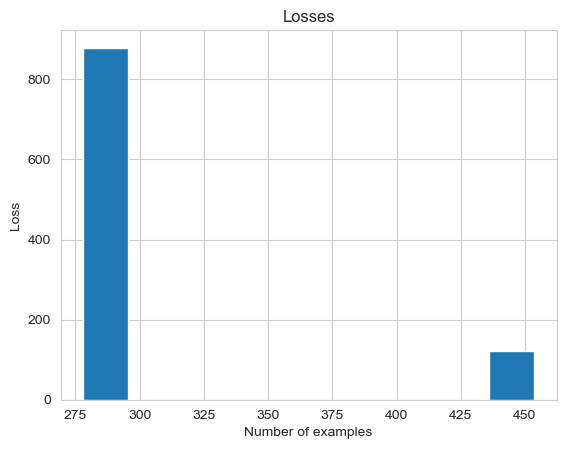

In [435]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses
min_index = np.argmin(looses)
print(looses[min_index])
kmeans = KMeans(k=5)
looses = []
for i in range(1000):
    kmeans = KMeans(k=5)
    best_random_int_values=initial_values[min_index]+np.random.normal()/40
    kmeans.fit(X,best_random_int_values,1)
    kmeans.get_wss(X)
    looses.append(kmeans.get_wss(X))

# Plot the WSS values against the number of clusters
x=np.arange(1000)
plt.hist(looses)
plt.title('Losses')
plt.xlabel('Number of examples')
plt.ylabel('Loss')
plt.show()


We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [436]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [437]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

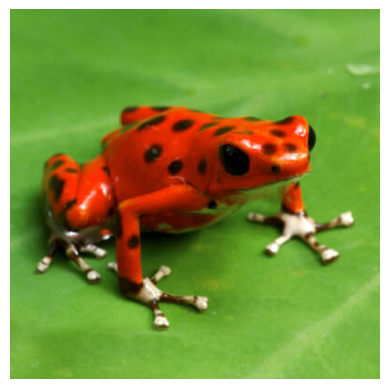

In [438]:
#Show image
plt.imshow(img)
plt.axis("off")

In [439]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

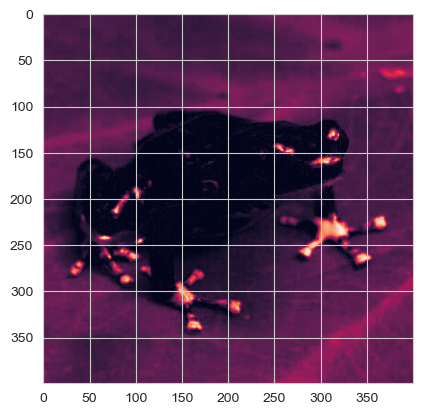

In [440]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [441]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.
def compute_centroids(centroids, data):
    new_centroids = []
    for i in range(len(centroids)):
        mask = (data[1] == i)
        if np.sum(mask) > 0:
            new_centroid = np.mean(data[0][mask], axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(centroids[i])
    return np.array(new_centroids)

In [442]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.
def assign(centroids, data):
    distances = np.sqrt(((data[0] - centroids[:, np.newaxis, np.newaxis])**2).sum(axis=3))
    labels = np.argmin(distances, axis=0)
    return labels

In [443]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def k_means(k, image):
    # Generate the centroids. Randomly. Our centroids are three dimensional.
    centroids = np.random.randint(0, 255, size=(k, 3))
    # Convert the image to a three-dimensional numpy array, and normalize it
    data = image.astype(np.float)# / 255.0
    #print(data)
    print(centroids)
    print("...")
    # Create an empty array for storing the labels
    labels = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    #print(labels)
    # Run the K-Means algorithm
    max_iterations = 100
    for i in range(max_iterations):
        # Assign each pixel to the closest centroid
        labels_new = assign(centroids, [data, labels])
        
        # If the labels have not changed, stop
        if np.all(labels_new == labels):
            break
        else:
            labels = labels_new
        
        # Compute the new centroids
        centroids_new = compute_centroids(centroids, [data, labels])
        
        # If the centroids have not changed, stop
        if np.allclose(centroids_new, centroids):
            break
        else:
            centroids = centroids_new
            
    # Convert the labels
    seg_img = np.zeros_like(image)
    for i in range(k):
        seg_img[labels == i] = centroids[i]
        
    return seg_img

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9384\141579732.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = image.astype(np.float)# / 255.0


[[ 45 117 127]]
...
[[223  34  24]
 [ 18 115  23]]
...
[[ 47 185 220]
 [215 108  30]
 [153 253  81]]
...
[[118 157 175]
 [164  56 131]
 [110 188  28]
 [172 139  18]]
...
[[ 53 192 197]
 [189 184  84]
 [104  95 133]
 [ 82 215  84]
 [ 10 196 101]]
...
[[121 231  57]
 [130  86 102]
 [ 21  18 157]
 [ 54 135  14]
 [254  29 101]
 [ 66  46  31]]
...


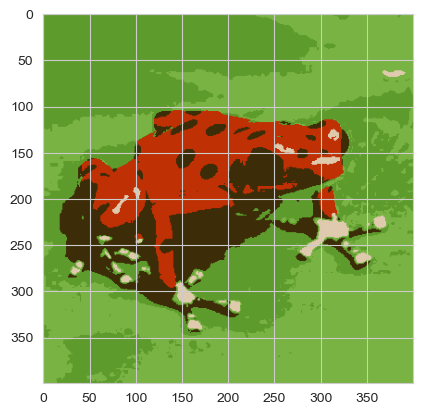

In [444]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,7):
    images.append(k_means(k,img))
plt.imshow(images[5].astype('uint8'))

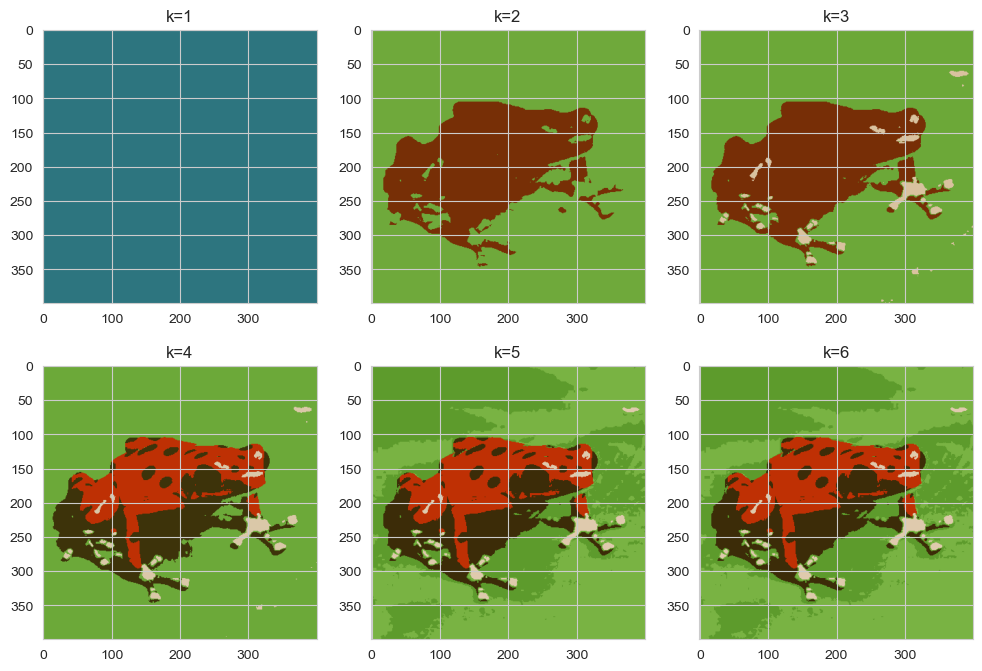

In [445]:
# Create a list of k values to use
k_values = [1, 2, 3, 4, 5, 6]


# Create a 2x3 subplot to display the images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each image on a separate subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].astype('uint8'))
    ax.set_title(f'k={k_values[i]}')

# Display the plot
plt.show()

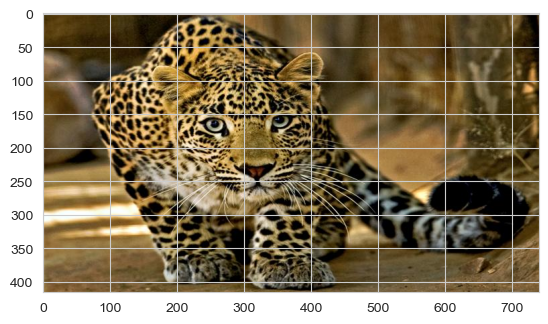

In [446]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('leopardo.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9384\141579732.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = image.astype(np.float)# / 255.0


[[32 72 43]]
...
[[160 237  96]
 [253 181 243]]
...
[[ 20 243 254]
 [160  12  49]
 [217 143 149]]
...
[[ 25 179 139]
 [ 76 229  59]
 [ 12 250  19]
 [203 177  70]]
...
[[ 11 152  43]
 [ 18 141 189]
 [ 48  58   4]
 [226  47 127]
 [ 65 184  95]]
...
[[ 80 168 160]
 [ 19 147 227]
 [194 173 245]
 [183 130  11]
 [243 237  22]
 [241  59 139]]
...


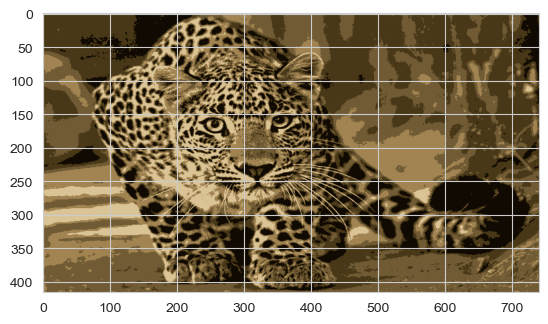

In [447]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,7):
    images.append(k_means(k,image))
plt.imshow(images[5].astype('uint8'))

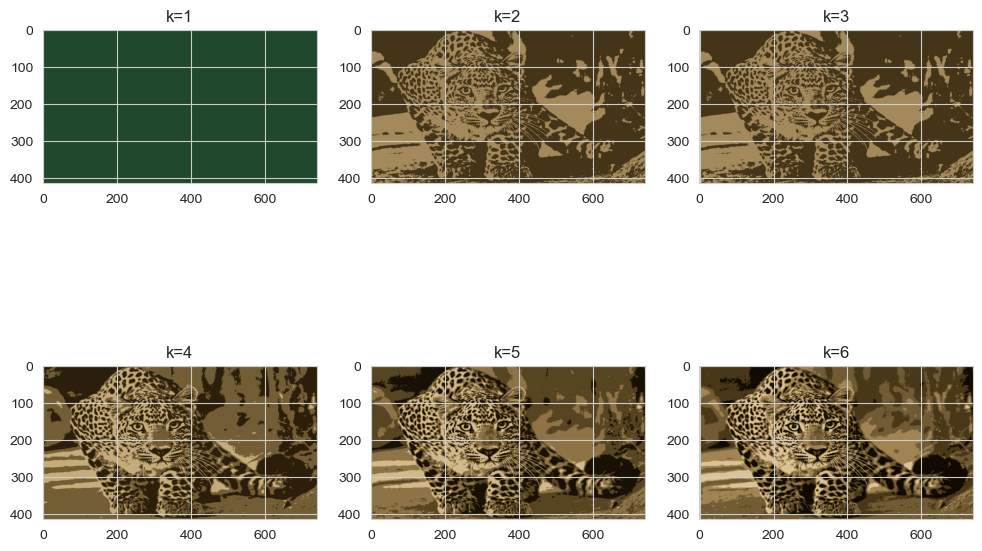

In [448]:
# Create a list of k values to use
k_values = [1, 2, 3, 4, 5, 6]


# Create a 2x3 subplot to display the images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each image on a separate subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].astype('uint8'))
    ax.set_title(f'k={k_values[i]}')

# Display the plot
plt.show()

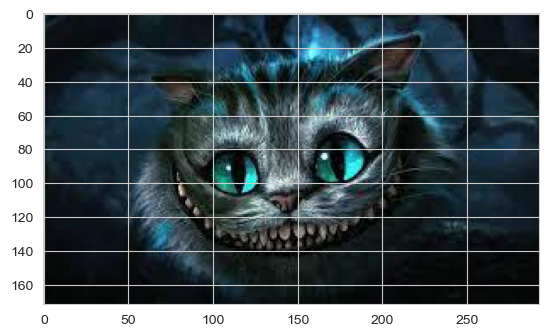

In [449]:
# Read in the image
image = cv2.imread('catalice.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image.astype('uint8'))

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9384\141579732.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = image.astype(np.float)# / 255.0


[[178 133 131]]
...
[[ 86 132 139]
 [175 125 124]]
...
[[ 49 150 116]
 [105  50 238]
 [247  83 114]]
...
[[ 83 172 127]
 [117 184 107]
 [  8   7 244]
 [ 59 224  35]]
...
[[230 190 153]
 [173 186 188]
 [213  26 111]
 [117 247  60]
 [ 27 159 211]]
...
[[ 76 245 115]
 [ 63 230 152]
 [ 46  67 139]
 [ 28  77  81]
 [152 208 193]
 [197  87 248]]
...


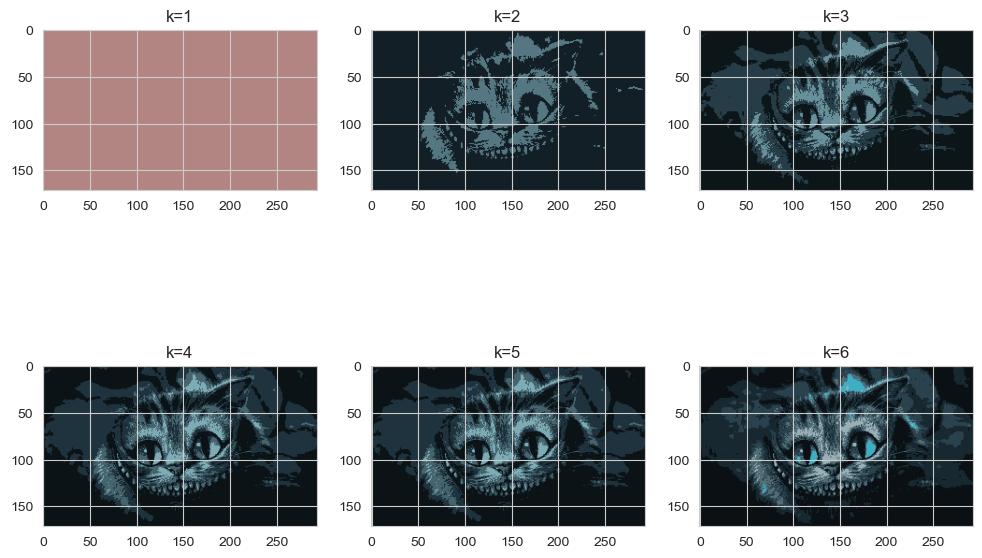

In [450]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,7):
    images.append(k_means(k,image))

# Create a list of k values to use
k_values = [1, 2, 3, 4, 5, 6]


# Create a 2x3 subplot to display the images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each image on a separate subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].astype('uint8'))
    ax.set_title(f'k={k_values[i]}')

# Display the plot
plt.show()

C:\Users\afrincon\AppData\Local\Temp\ipykernel_9384\141579732.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = image.astype(np.float)# / 255.0


[[ 21 215  43]]
...
[[115  39  62]
 [223 112 155]]
...
[[ 11 117 115]
 [171 202 195]
 [105  62   4]]
...
[[ 32 208 101]
 [159  58 187]
 [ 63 189 180]
 [132  24 230]]
...
[[ 69 185  34]
 [221 109 162]
 [138 129  80]
 [192  50 225]
 [ 74 100  82]]
...
[[ 60  67  38]
 [ 85 219  10]
 [  6  35 176]
 [ 13 220 215]
 [ 91 241  72]
 [ 95   7 112]]
...


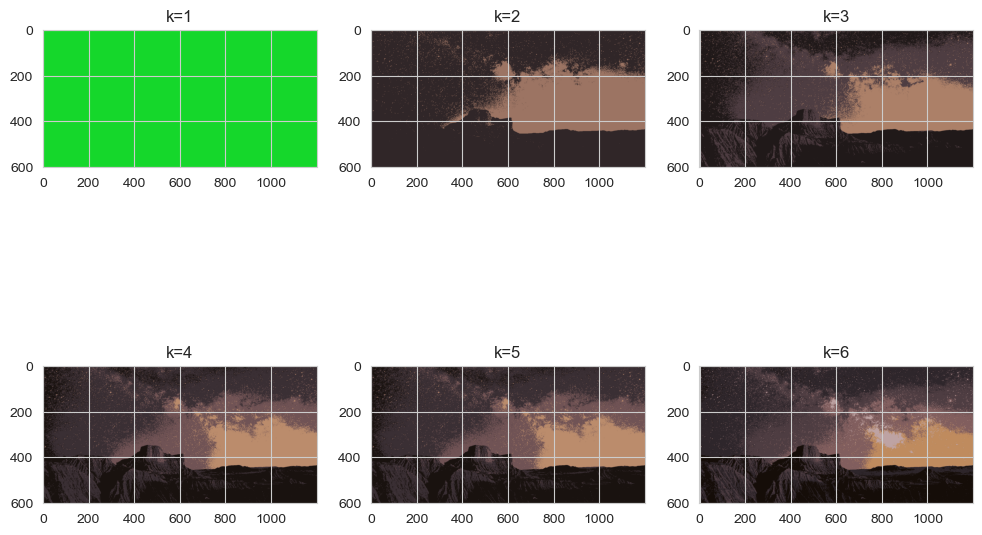

In [451]:
# Read in the image
image = cv2.imread('dessert.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,7):
    images.append(k_means(k,image))

# Create a list of k values to use
k_values = [1, 2, 3, 4, 5, 6]


# Create a 2x3 subplot to display the images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each image on a separate subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i].astype('uint8'))
    ax.set_title(f'k={k_values[i]}')

# Display the plot
plt.show()